[과제] 4개의 카테고리 뉴스기사를 크롤링한 후 수행
- 뉴스기사 카테고리별 저장
- 텍스트 전처리 및 피처 벡터화
- 모델링 및 평가

In [4]:
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd

In [5]:
# 유명한 신문사는 그래도 100번 안
import numpy as np
import pandas as pd
oid = list(np.arange(1,101))
for x,y in enumerate(oid):
    oid[x] = format(y, '03')

In [9]:
# 유명한 신문사는 그래도 100번 안
import numpy as np
import pandas as pd
oid = list(np.arange(1,101))
for x,y in enumerate(oid):
    oid[x] = format(y, '03')
#IT/과학 뉴스 500개/sid1=105/oid=366(언론사)

df_it=[]
i=0
j=1
c=0
while(i<=500):
    try:
        f = np.random.choice(oid)
        j+=1
        n=format(j, '010')
        url = 'https://news.naver.com/main/read.naver?mode=LSD&mid=shm&sid1=105&oid='+f+'&aid='+n
        headers = { "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.88 Safari/537.36" }
        response=requests.get(url, headers=headers)
        response.status_code
        r = response.text
        soup = BeautifulSoup(r,'html.parser')
        a=soup.select('#articleBodyContents')
        for i in a:
            news_text=i.text
            df_it.append(news_text)
#         news_text=a[0].text   # 하위태그까지 파싱하는 경우 text를 사용
#         df_it.append(news_text)
        i=len(df_it)
        print(i)
    except KeyboardInterrupt:
        break

print(c)

1
2
2
2
3
4
4
5
5
6
6
6
7
7
8
8
8
8
8
8
8
8
9
10
10
10
10
11
12
13
13
13
13
13
13
14
14
14
14
14
15
16
16
16
16
16
16
16
16
17
17
17
17
17
18
19
20
21
22
22
22
23
23
24
24
24
24
25
26
27
27
28
28
29
29
29
30
30
30
31
31
32
33
34
35
35
35
35
35
36
37
38
38
39
39
39
39
39
39
40
40
40
41
41
42
43
44
44
45
45
46
47
48
49
49
49
49
50
50
51
52
53
53
53
54
54
55
55
55
56
57
58
58
59
60
60
60
61
61
61
61
61
62
63
64
64
65
65
66
66
67
67
68
69
69
70
70
70
70
70
70
71
71
71
72
72
73
73
74
74
75
75
75
76
77
78
78
78
78
79
80
80
81
81
81
81
82
82
82
82
83
83
83
84
84
84
85
86
86
87
88
88
88
89
89
90
90
91
91
92
93
94
95
95
95
95
95
96
97
97
97
97
97
97
97
98
99
100
100
100
101
101
102
102
102
102
102
103
103
104
105
106
107
107
108
108
108
109
110
111
112
113
113
114
115
115
115
115
115
116
116
117
117
118
118
119
120
120
121
122
122
122
122
122
122
123
123
124
125
125
126
127
127
127
127
127
128
129
129
129
130
131
131
131
131
132
132
133
133
133
134
134
135
135
136
137
137
137
137
138
138
139
14

In [50]:
df=pd.DataFrame(df_it)
df

,0
0,\n\n\n\n\n\t\n\t인천국제공항공사는 1일 인천국제공항 입구에 한국적 특성...
1,\n\n\n\n\n\t\n\t2일부터 서울 노원 양천 송파구 전역에서 폐형광등과 폐...
2,\n\n\n\n\n\t\n\t아이엠에프 관리체제 아래 있던 1999년 직장에서 명예...
3,\n\n\n\n\n\t\n\t박봉철 코치나 회장(50)은 홍콩에서 사업을 하고 있다...
4,\n\n\n\n\n\t\n\t【대전=뉴시스】 대전시는 오는 12월31일자로 위탁운영...
...,...
496,\n\n\n\n\n\t\n\tRobert Vamosi (ZDNet Review)\r...
497,"\n\n\n\n\n\t\n\t 일본 관방장관과 부장관, 익명의 일본 수뇌가 잇따라..."
498,\n\n\n\n\n\t\n\t주식투자자의 매매불편을 해소하기 위해 정규시간외 거래시...
499,\n\n\n\n\n\t\n\t음악·무용▶매튜 본의 호두까기 인형/ 2003년 공연 ...


In [64]:
import re
df.columns=['과학']
# df['과학']=df.과학.apply(lambda x: re.sub('\n',' ',x))
# df['과학']=df.과학.apply(lambda x: re.sub('\t',' ',x))
df['과학']=df.과학.apply(lambda x: re.sub('\r',' ',x))
df['과학']=df.과학.apply(lambda x: re.sub('\W',' ',x))

In [65]:
df

,과학
0,인천국제공항공사는 1일 인천국제공항 입구에 한국적 특성을 살린 자연공...
1,2일부터 서울 노원 양천 송파구 전역에서 폐형광등과 폐건전지 분리수거...
2,아이엠에프 관리체제 아래 있던 1999년 직장에서 명예퇴직을 했다 ...
3,박봉철 코치나 회장 50 은 홍콩에서 사업을 하고 있다 그는 해외에...
4,대전 뉴시스 대전시는 오는 12월31일자로 위탁운영이 만료되는 대...
...,...
496,Robert Vamosi ZDNet Review 수년 동안...
497,일본 관방장관과 부장관 익명의 일본 수뇌가 잇따라 일본이 핵무기...
498,주식투자자의 매매불편을 해소하기 위해 정규시간외 거래시간이 내달 14...
499,음악 무용 매튜 본의 호두까기 인형 2003년 공연 당시 전석 매진...


In [7]:
url = 'https://news.naver.com/main/read.naver?mode=LSD&mid=shm&sid1=101&oid=448&aid=0000000062'
headers = { "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.88 Safari/537.36" }
response=requests.get(url, headers=headers)
response.status_code
r = response.text
soup = BeautifulSoup(r,'html.parser')
a=soup.select('#articleBodyContents')
# news_text=a[1].text   # 하위태그까지 파싱하는 경우 text를 사용
for i in a:
    print(i.text)
news_text


'\n\n\n\n\n\t\n\t정부가 우리 최근 경제에 대한 내수 회복 우려를 이어가면서 대외 불확실성도 확대된다고 진단했다.기획재정부는 18일 \'최근 경제동향(그린북) 3월호\'에서 "우리 경제는 고용 증가세 확대가 이어지는 가운데 수출도 견조한 개선세를 지속하고 있으나, 변이 바이러스 확산세 등에 따른 내수 회복 제약이 우려된다"라고 밝혔다. 지난해 12월부터 넉 달째 코로나19의 내수 영향에 대해 우려를 나타낸 것이다.그러면서 "대외적으로는 미국 연방준비제도 금리 인상 등 주요국 통화정책 전환이 개시된 가운데 러시아의 우크라이나 침공에 따른 영향으로 공급망 차질, 인플레이션 우려 등이 심화했다"라고 덧붙였다.또 "이에 따라 원자재·금융시장의 변동성이 더 증가하는 등 불확실성이 지속해서 확대하고 있다"라고 평가했다.기재부는 "선제적 물가 관리 등 민생 안정과 대내외 리스크 점검, 우리 경제에 미칠 파급 영향 최소화에 전력을 기울이면서 신속한 추가경정예산 집행 등을 통해 변이 바이러스 확산에 따른 피해에 대응하고 경기 회복 뒷받침에 주력하겠다"라고 강조했다. \n\t\n'

In [ ]:
# 경제 뉴스 500개/sid1=101/oid=366(언론사)
import requests
from bs4 import BeautifulSoup

df_it=[]
i=0
n=1
c=0
while(i<=500):
    try:
        f = np.random.choice(oid)
        n+=i
        n=format(n, '010')
        url = 'https://news.naver.com/main/read.naver?mode=LSD&mid=shm&sid1=101&oid='+f+'&aid='+n
        headers = { "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.88 Safari/537.36" }
        response=requests.get(url, headers=headers)
        response.status_code
        r = response.text
        soup = BeautifulSoup(r,'html.parser')
        a=soup.select('#articleBodyContents')
        news_text=a[0].text   # 하위태그까지 파싱하는 경우 text를 사용
        df_it.append(news_text)
        i=len(df_it)
        
    except:
        c+=1
        continue
print(c)


<!DOCTYPE html>
 <html data-dark="false" lang="ko"> <head> <meta charset="utf-8"/> <title>NAVER</title> <meta content="IE=edge" http-equiv="X-UA-Compatible"/> <meta content="width=1190" name="viewport"/> <meta content="NAVER" name="apple-mobile-web-app-title"> <meta content="index,nofollow" name="robots"> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="description"> <meta content="네이버" property="og:title"/> <meta content="https://www.naver.com/" property="og:url"/> <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" property="og:image"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" property="og:description"> <meta content="summary" name="twitter:card"/> <meta content="" name="twitter:title"/> <meta content="https://www.naver.com/" name="twitter:url"/> <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" name="twitter:image"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="twitter:de
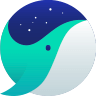
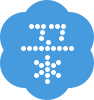

In [46]:
URL = 'http://naver.com'
response = requests.get(URL)
response.status_code
naver = response.text
soup = BeautifulSoup(naver,'html.parser')
a = soup.select('#NM_FAVORITE > div.group_nav > ul.list_nav.type_fix > li> a',limit=5)
print(soup)
for i in a:
    print(i.text,end=" ")     # 하위태그까지 파싱하는 경우 text를 사용

In [86]:
import pandas as pd
df=pd.DataFrame(df_it)
df

,0
0,\n\n\n\n\n\t\n\t【제주=뉴시스】 제주시는 다음달 1일부터 12월 15일...
1,\n\n\n\n\n\t\n\t지난 일요일 처가에 벌초하러 가면서 생긴 일이다. 지난...
2,\n\n\n\n\n\t\n\t[edaily 하정민기자] 리노공업(58470)은 대만...
3,\n\n\n\n\n\t\n\t 며칠 전 정년퇴직하신 분들이 모여 소일하신다는 사무실...
4,\n\n\n\n\n\t\n\t 그린화재는 이달들어 70억원의 유상증자를 실시하고 8...
...,...
214,\n\n\n\n\n\t\n\tBy Yoo Cheong-mo Staff reporte...
215,\n\n\n\n동영상 뉴스\n\n\n\n\n 대선 후보 세 명이 오늘은 서로 다른 ...
216,\n\n\n\n\n\t\n\t노동부와 한국산업인력공단은 지난 3일 우리나라 최고의 ...
217,\n\n\n\n\n\t\n\t일상 생활에서 나를 공식적으로 나타내야 할 때 가장 빈...


In [4]:
import selenium
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import requests
from bs4 import BeautifulSoup
import pandas as pd
import urllib.request
import time
from IPython.display import display
import warnings
warnings.filterwarnings(action='ignore')

In [30]:
driver = webdriver.Chrome('C:\Tool\chromedriver.exe')
driver.get('https://news.naver.com/')

# cat=['경제','생활','과학','세계']
cat=['li:nth-child(3)','li:nth-child(5)','li:nth-child(6)','li:nth-child(7)']

driver.find_element_by_css_selector('body > section > header > div.Nlnb._float_lnb > div > div > div.Nlnb_left._lnb_scroll > div > div > ul > li:nth-child(3)').click()
for i in range(1,10):
    try:
        i=str(i)
        news_url = '//*[@id="main_content"]/div/div[2]/div[1]/div['+ i +']/div[2]/ul/li[1]/div[1]/a'
        print(news_url)
        driver.find_element_by_xpath(news_url).click()
        driver.back()
        time.sleep(2)
    except:
        try:
            news_url = '//*[@id="main_content"]/div/div[2]/div[1]/div['+ i +']/div[2]/ul/li[1]/div[2]/a'
            driver.find_element_by_xpath(news_url).click()
            driver.back()
            time.sleep(2)
        except:
            print('오류',i)
            break
        
# //*[@id="main_content"]/div/div[2]/div[1]/div[1]/div[2]/ul/li[1]/div/a
# //*[@id="main_content"]/div/div[2]/div[1]/div[2]/div[2]/ul/li[1]/div[2]/a
# //*[@id="main_content"]/div/div[2]/div[1]/div[1]/div[2]/ul/li[1]/div[1]/div/a

//*[@id="main_content"]/div/div[2]/div[1]/div[1]/div[2]/ul/li[1]/div[1]/a
//*[@id="main_content"]/div/div[2]/div[1]/div[2]/div[2]/ul/li[1]/div[1]/a
//*[@id="main_content"]/div/div[2]/div[1]/div[3]/div[2]/ul/li[1]/div[1]/a
//*[@id="main_content"]/div/div[2]/div[1]/div[4]/div[2]/ul/li[1]/div[1]/a
//*[@id="main_content"]/div/div[2]/div[1]/div[5]/div[2]/ul/li[1]/div[1]/a
//*[@id="main_content"]/div/div[2]/div[1]/div[6]/div[2]/ul/li[1]/div[1]/a
//*[@id="main_content"]/div/div[2]/div[1]/div[7]/div[2]/ul/li[1]/div[1]/a
오류 7


In [ ]:
https://news.naver.com/main/read.naver?mode=LSD&mid=shm&sid1=105&oid=023&aid=0003679597